In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [3]:
pd.options.display.max_colwidth=800
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)

In [43]:
df = pd.read_csv('datasets/SatisfactionClients/cdiscount_retraite.csv', index_col=0)
df.sample(3)

,pays,note,titre,commentaire,Commentaire_filtre,titre_filtre
7577,FR,5,Commande très satisfaisante,"Il y a 4 heuresSur invitationCommande très satisfaisantela livraison dans les délais, les produits correspondaient à mes attentes, le rapport qualité/prix est plus que respecté.Date de l'expérience: 14 novembre 2022","['heuressur', 'invitationcommande', 'très', 'satisfaisantela', 'livraison', 'délais', 'produits', 'correspondaient', 'attentes', 'rapport', 'qualité', 'prix', 'plus', 'respecté', 'date', 'expérience', 'novembre']","['commande', 'très', 'satisfaisante']"
80293,FR,5,J'avais besoin d'un nouveau carburateur…,ll y a 3 joursSur invitationJ'avais besoin d'un nouveau carburateur…J'avais besoin d'un nouveau carburateur pour un tracteur-tondeuse et j'ai également pu retourner un chargeur de batterie acheté inutilement il y a quelques jours.D'avance merci.Date de l'expérience: 11 novembre 2022,"['jourssur', 'invitationj', 'besoin', 'nouveau', 'carburateur', 'besoin', 'nouveau', 'carburateur', 'tracteur', 'tondeuse', 'également', 'retourner', 'chargeur', 'batterie', 'acheté', 'inutilement', 'quelques', 'jours', 'avance', 'merci', 'date', 'expérience', 'novembre']","['besoin', 'nouveau', 'carburateur']"
27993,FR,5,J'avais besoin d'un nouveau carburateur…,ll y a 3 joursSur invitationJ'avais besoin d'un nouveau carburateur…J'avais besoin d'un nouveau carburateur pour un tracteur-tondeuse et j'ai également pu retourner un chargeur de batterie acheté inutilement il y a quelques jours.D'avance merci.Date de l'expérience: 11 novembre 2022,"['jourssur', 'invitationj', 'besoin', 'nouveau', 'carburateur', 'besoin', 'nouveau', 'carburateur', 'tracteur', 'tondeuse', 'également', 'retourner', 'chargeur', 'batterie', 'acheté', 'inutilement', 'quelques', 'jours', 'avance', 'merci', 'date', 'expérience', 'novembre']","['besoin', 'nouveau', 'carburateur']"


###### Chargement des stopswords

In [5]:
# chargement de la bibliothèque de stopwords et de tokenisation
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize.regexp import RegexpTokenizer
from nltk.tokenize import PunktSentenceTokenizer

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\t.fourtouill\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# chargement des listes stopwords pour les 3 langues principales 
stop_words_french = stopwords.words('french')
stop_words_english = stopwords.words('english')
stop_words_spanish = stopwords.words('spanish')

In [16]:
# création d'une stopwords regroupant les 3 langues
stop_words = stop_words_french + stop_words_english + stop_words_spanish

###### Wordcloud

In [8]:
from PIL import Image
from wordcloud import WordCloud

In [9]:
text_commentaire = ''
for comment in df['commentaire']:
    text_commentaire += comment
    
text_titre = ''
for comment in df['titre']:
    text_titre += comment

In [38]:
def plot_word_cloud(text, masque, background_color= "black", max_words=100, stopwords=stop_words):
    # Définir un masque
    mask_coloring =  np.array(Image.open(str(masque)))
    # Définir le calque du nuage des mots
    wc= WordCloud(background_color=background_color, max_words=max_words, 
                 stopwords=stop_words, mask= mask_coloring, 
                 max_font_size=50, random_state=42)
    # Générer et afficher le nuage de mots
    plt.figure(figsize= (20,10))
    wc.generate(text)
    plt.imshow(wc)
    plt.show()

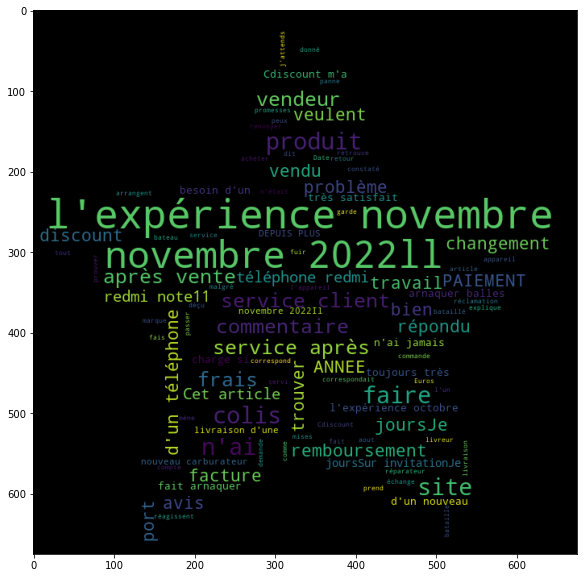

In [39]:
plot_word_cloud(text_commentaire, "images/star6.jpg")

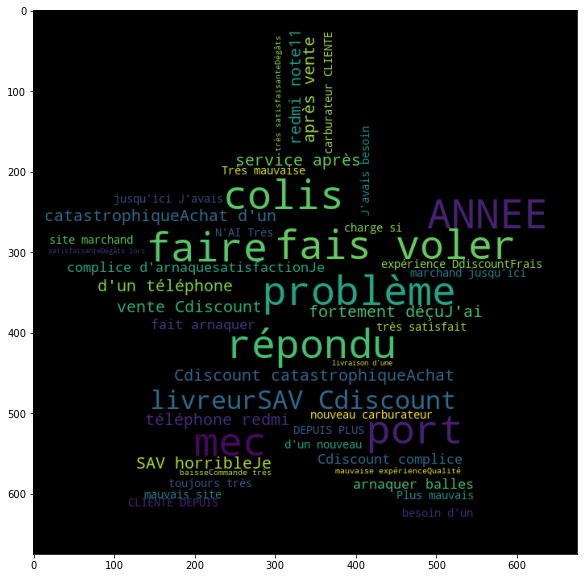

In [40]:
plot_word_cloud(text_titre, masque="images/star6.jpg")

### Wordcloud appliqué aux colonnes retraitées

In [44]:
text_commentaire_filtre = ''
for comment in df['Commentaire_filtre']:
    text_commentaire_filtre += comment
    
text_titre_filtre = ''
for comment in df['titre_filtre']:
    text_titre_filtre += comment

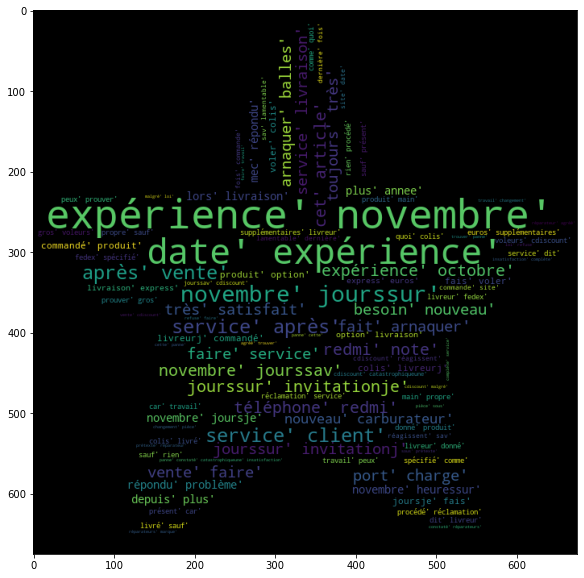

In [45]:
plot_word_cloud(text_commentaire_filtre, "images/star6.jpg")

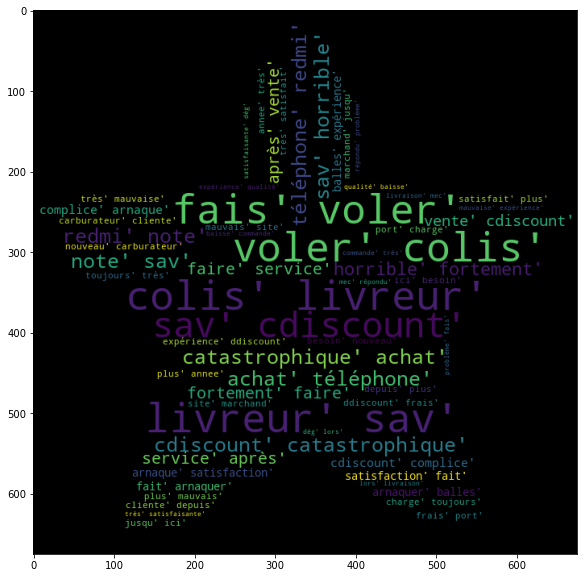

In [46]:
plot_word_cloud(text_titre_filtre, "images/star6.jpg")

###### retraitement des commentaires et titres 

In [25]:
def commentaire_filtering(txt, stop_words):
    new_txt = []
    tokenizer = RegexpTokenizer("[a-zA-Zéèëãñ]{3,}")
    tokens = tokenizer.tokenize(txt.lower())
    for word in tokens:
        if word not in stop_words:
            new_txt.append(word)
    return new_txt

In [26]:
# création d'une colonne commentaire_filtre par application de la fonction commentaire_filtering à la colonne commentaire
t0 = time()
df['Commentaire_filtre'] = df['commentaire'].apply(lambda x : commentaire_filtering(x, stop_words))
print('le temps de calcul est de {:.2f}'.format(time()-t0))

le temps de calcul est de 32.80


In [27]:
# création d'une colonne titre_commentaire_filtre par application de la fonction commentaire_filtering à la colonne titre_commentaire
t0 = time()
df['titre_filtre'] = df['titre'].apply(lambda x : commentaire_filtering(x, stop_words))
print('le temps de calcul est de {:.2f}'.format(time()-t0))

le temps de calcul est de 3.13


In [28]:
df.sample(3)

,pays,note,titre,commentaire,Commentaire_filtre,titre_filtre
91771,FR,5,Je suis toujours très satisfait de C…,"ll y a 3 joursSur invitationJe suis toujours très satisfait de C…Je suis toujours très satisfait de C discount, c'est fiable, efficace et honnête , je fais mes achats via ce site depuis des années et j'ai jamais été déçu, ET DE PLUS C'EST FRANCAISDate de l'expérience: 11 novembre 2022","[jourssur, invitationje, toujours, très, satisfait, toujours, très, satisfait, discount, fiable, efficace, honn, fais, achats, via, site, depuis, années, jamais, plus, francaisdate, expérience, novembre]","[toujours, très, satisfait]"
103488,FR,1,Je me suis fait arnaquer 1400 balles en…,"ll y a 5 joursJe me suis fait arnaquer 1400 balles en…Je me suis fait arnaquer 1400 balles en achetant un iPhone et en recevant un carton vide, ils ne veulent pas me rembourser sans que je porte plainte contre X, problème, les gendarmes ne veulent pas retenir ma plainte car ce n’est pas une infraction pénale. Bref, A FUIR AU PLUS VITE !Date de l'expérience: 05 novembre 2022","[joursje, fait, arnaquer, balles, fait, arnaquer, balles, achetant, iphone, recevant, carton, vide, veulent, rembourser, sans, porte, plainte, contre, problème, gendarmes, veulent, retenir, plainte, car, infraction, pénale, bref, fuir, plus, vite, date, expérience, novembre]","[fait, arnaquer, balles]"
114997,FR,5,Commande très satisfaisante,"Il y a 4 heuresSur invitationCommande très satisfaisantela livraison dans les délais, les produits correspondaient à mes attentes, le rapport qualité/prix est plus que respecté.Date de l'expérience: 14 novembre 2022","[heuressur, invitationcommande, très, satisfaisantela, livraison, délais, produits, correspondaient, attentes, rapport, qualité, prix, plus, respecté, date, expérience, novembre]","[commande, très, satisfaisante]"


In [29]:
df.to_csv('datasets/SatisfactionClients/cdiscount_retraite.csv')